X.shape: (26, 2)


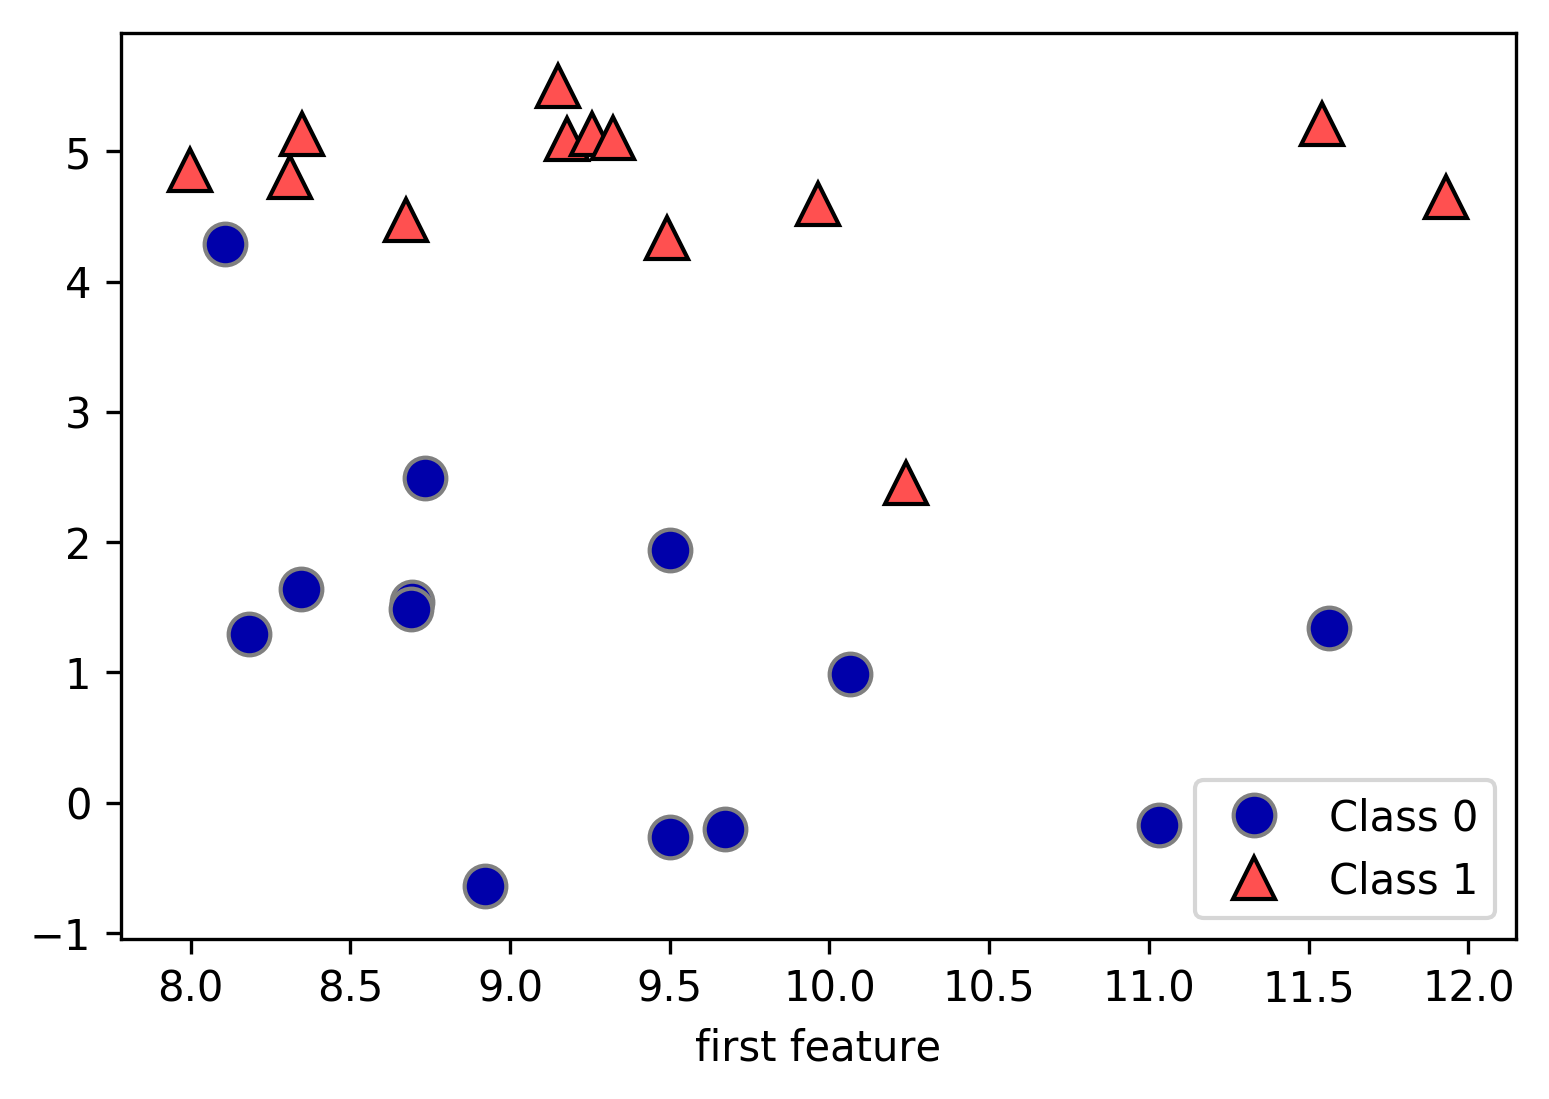

In [2]:
%matplotlib inline
from preamble import *

X,y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('first feature')
print('X.shape: {}'.format(X.shape))

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print('cancer.keys(): {}'.format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print('shape of cancer data: {}'.format(cancer.data.shape))

shape of cancer data: (569, 30)


In [5]:
print('sample counts per class: \{}', {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

sample counts per class: \{} {'malignant': 212, 'benign': 357}


In [6]:
print('feature names:]n{}'.format(cancer.feature_names))

feature names:]n['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [13]:
from sklearn.datasets import load_boston
boston = load_boston()

print('data shape:{}'.format(boston.data.shape))
print(boston['feature_names'])

data shape:(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

# 
import numpy as np
pred = clf.predict(X_test)

correct = len(y_test) - np.count_nonzero(pred-y_test)
print(correct*1.0 / len(y_test))

0.977777777778
0.9777777777777777


In [71]:
# pipline 及自动化调参
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV   # 自动化调参

pipe = Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', KNeighborsClassifier(n_neighbors))])
estimator = GridSearchCV(pipe, param_grid={'clf__n_neighbors': [1,6,3]})
estimator.fit(X_train, y_train)
print(estimator.best_estimator_)
print(estimator.score(X_test, y_test))

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform'))])
0.857142857143


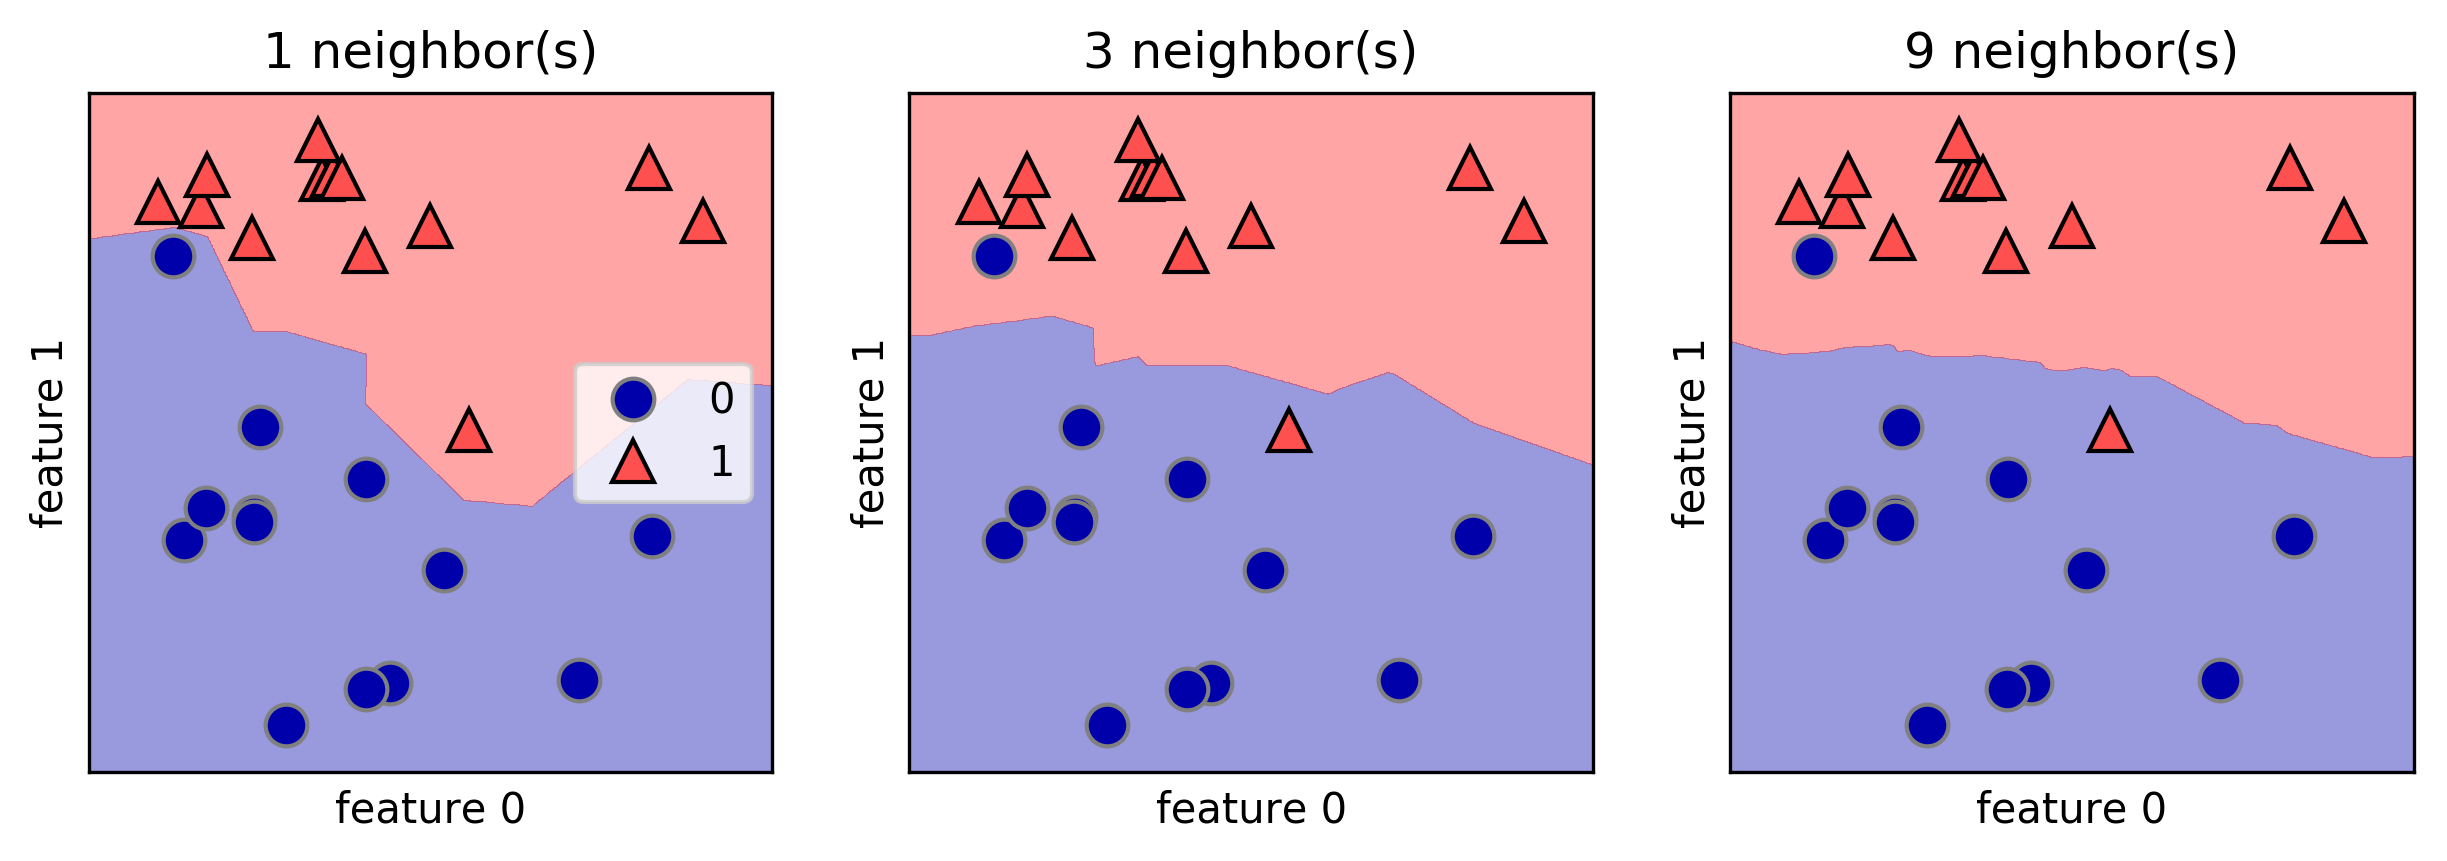

In [69]:
# 可视化不同n_neighbors
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc='best')